In [134]:
import warnings
warnings.simplefilter("ignore")
import joblib
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV             #importing the necessary libraries

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df                                  #loading the dataset from Github repository link               

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [6]:
df.shape

(891, 12)

There are 891 rows and 12 columns present in our dataset.

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()                           #checking if any null values present in the dataset or not

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It can be seen that out of 891 records 177 are missing in the Age column, 687 out of 891 are missing in the Cabin column
and 2 out of 891 are missing in the Embarked column

In [9]:
df=df.drop("Cabin",axis=1)                        #dropping the cabin coulmn as very high number of null values present.

In [12]:
df=df.drop(["PassengerId","Name"], axis=1)            

Dropping the PassengerId and Name column as they will not serve any purpose in predicting whether a passenger survived or not.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


As it is clear from getting the info of the dataset we can see that there are 4 columns having int64 datatype,
2 columns having object data type and 2 columns having object datatype.

In [110]:
df.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.543790
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

Checking whether any skewness is present in our dataset indicating anykind of outliers. The accepatble range of skewness is +-0.5
and it is clear that only  Survived and Age columns are within that range.

# VISUALIZATION

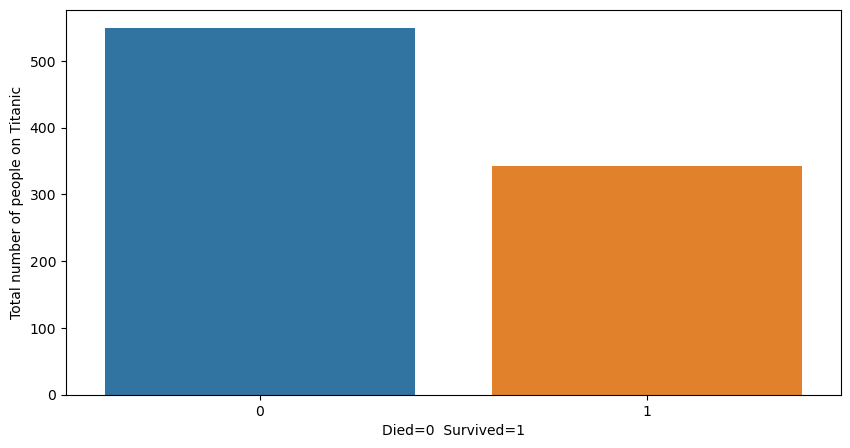

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=df)
plt.xlabel('Died=0  Survived=1')
plt.ylabel('Total number of people on Titanic')
plt.show()


It can be seen that there are less number of people who survived when the titanic sinked as compared to the number of people who died.

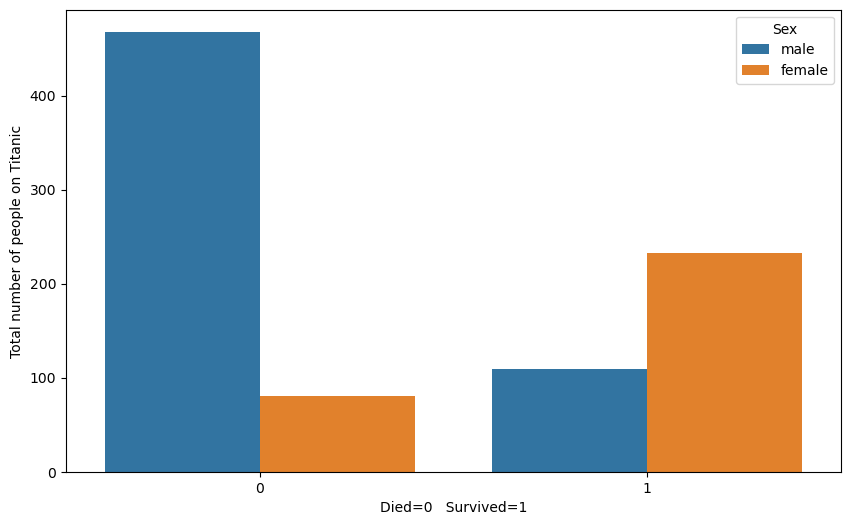

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=df,hue='Sex' )
plt.xlabel('Died=0   Survived=1')
plt.ylabel('Total number of people on Titanic')
plt.show()

It can be seen from the above plot after adding the Sex column while plotting that 
the number of men died is higher as compared to the number of women died during the sinking of titanic.

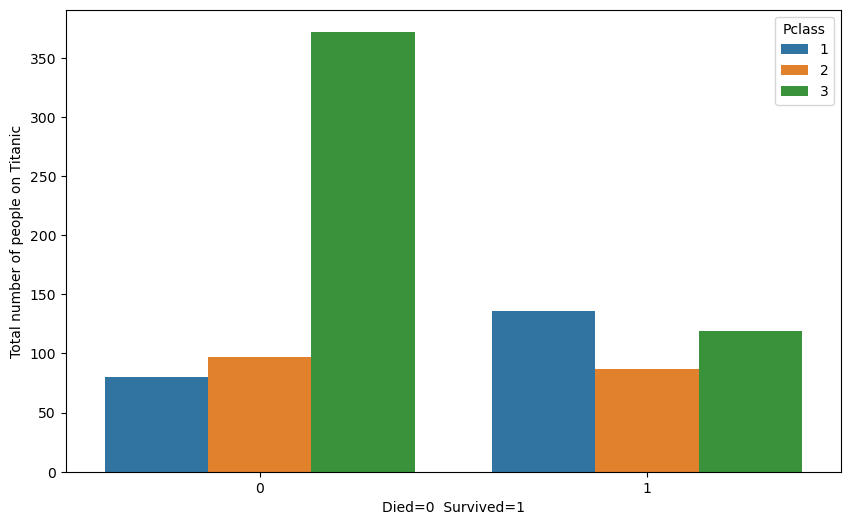

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.xlabel('Died=0  Survived=1')
plt.ylabel('Total number of people on Titanic')
plt.show()

When plotting the visualization by adding Pclass it can be seen that the number of passengers from Pclass 3 is highest,
than Pclass 2 passengers died more than passengers from Pclass 1.

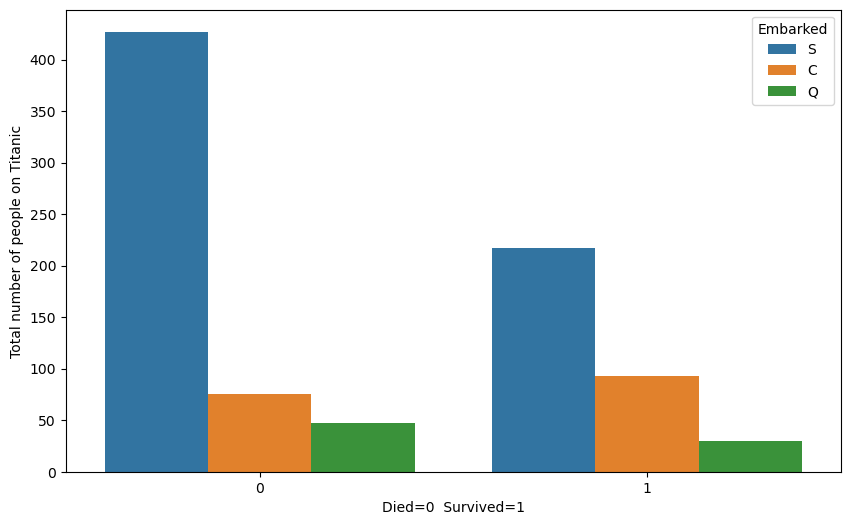

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df, hue='Embarked')
plt.xlabel('Died=0  Survived=1')
plt.ylabel('Total number of people on Titanic')
plt.show()

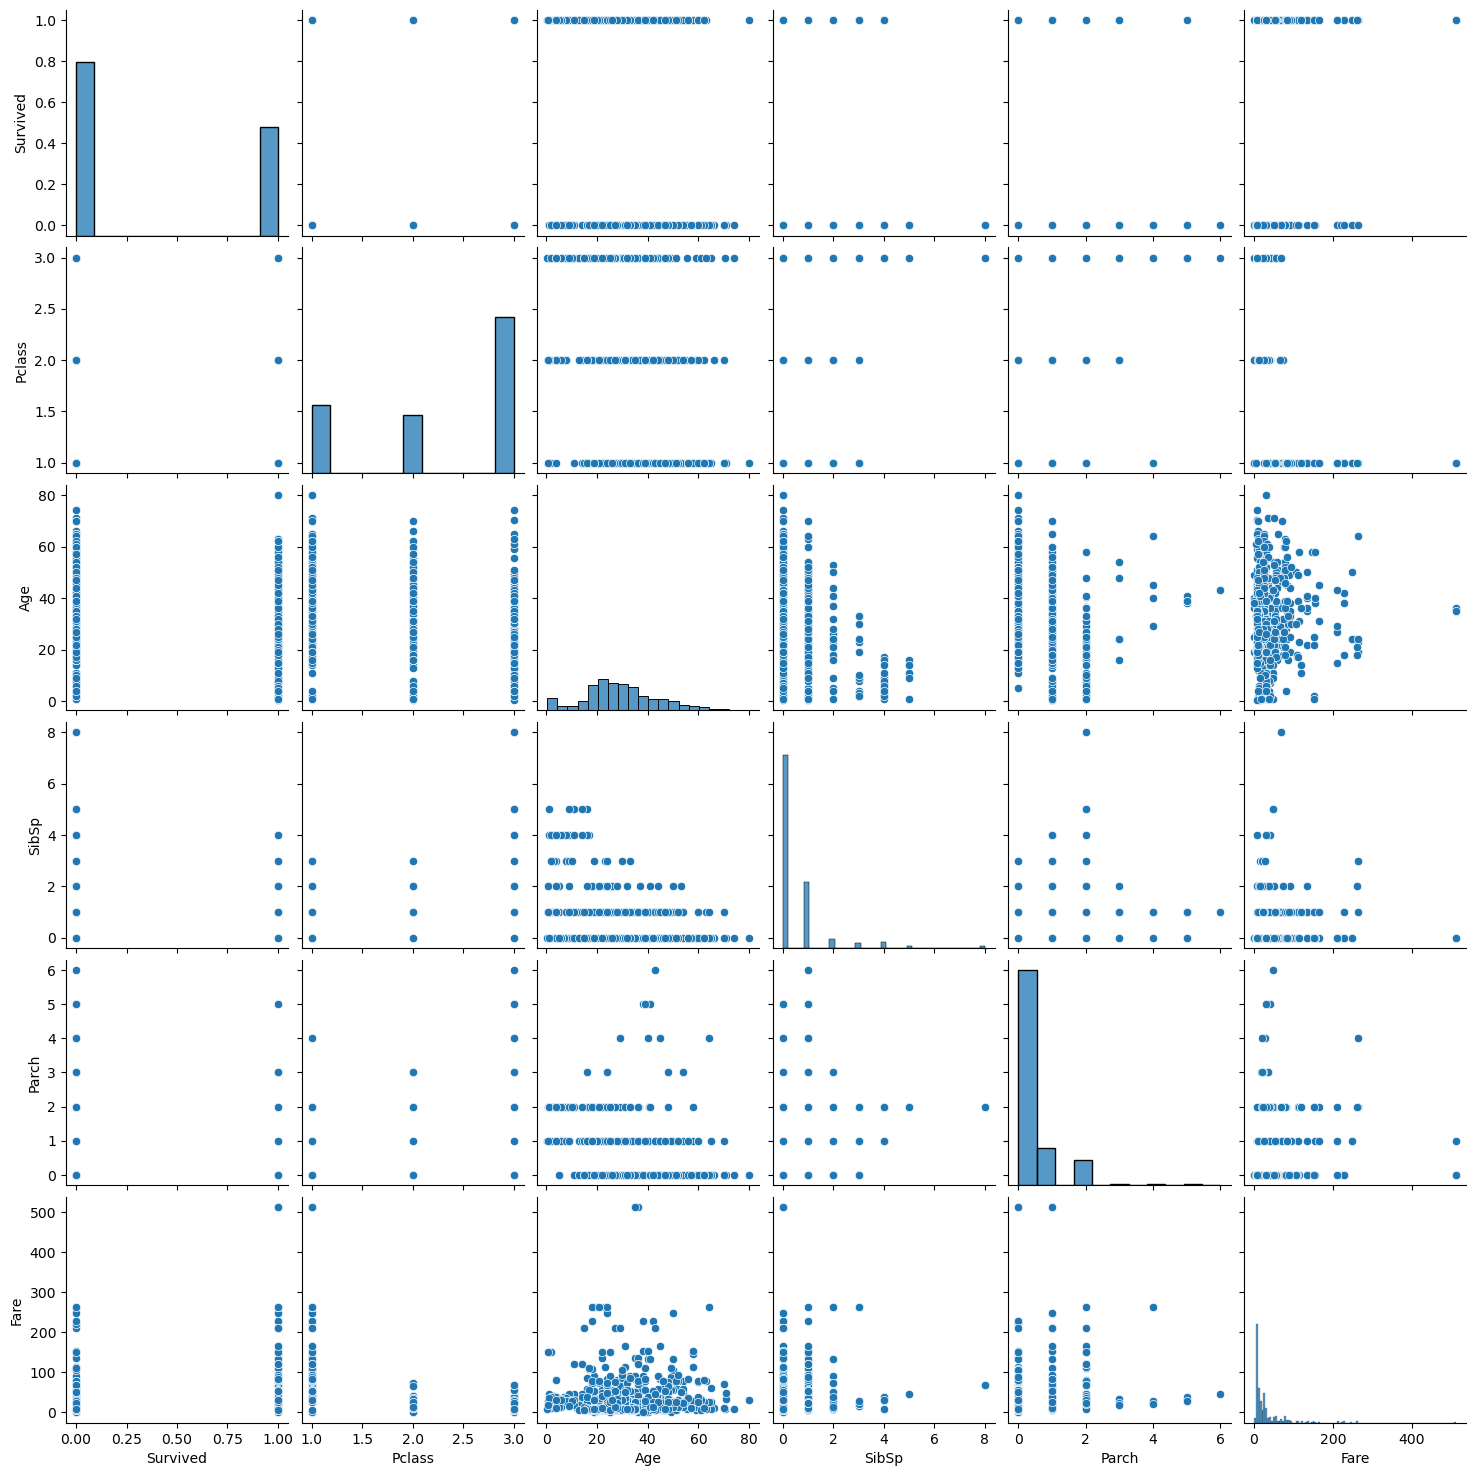

In [23]:
sns.pairplot(df)
plt.show()

In [25]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


It is clear by observing few entries from the dataset that the ticket column is not serving any purpose in prediction
whether a passenger survived or died when the titanic sinked. So we can drop the column "Ticket" to make the dataset simple
for testing models.

In [26]:
df=df.drop("Ticket",axis=1)

# VIOLIN PLOT

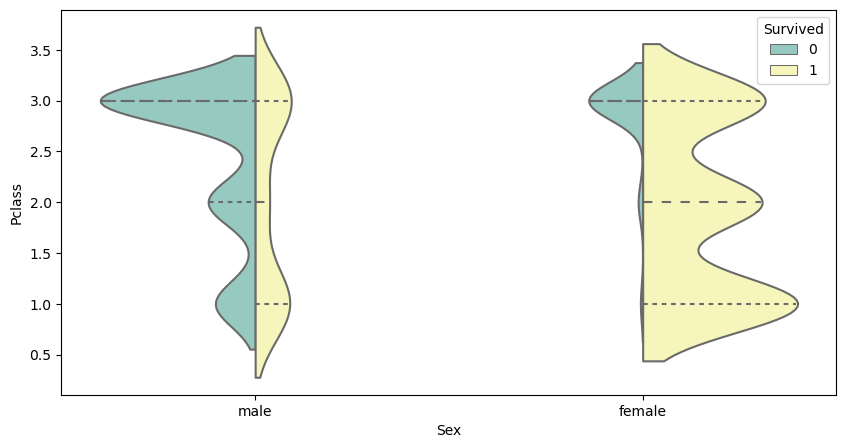

In [30]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Sex",y="Pclass", hue="Survived", data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

From the above plot it is clear that the males who were in Pclass 3 died most in comparison to Pclass 1 and 2.

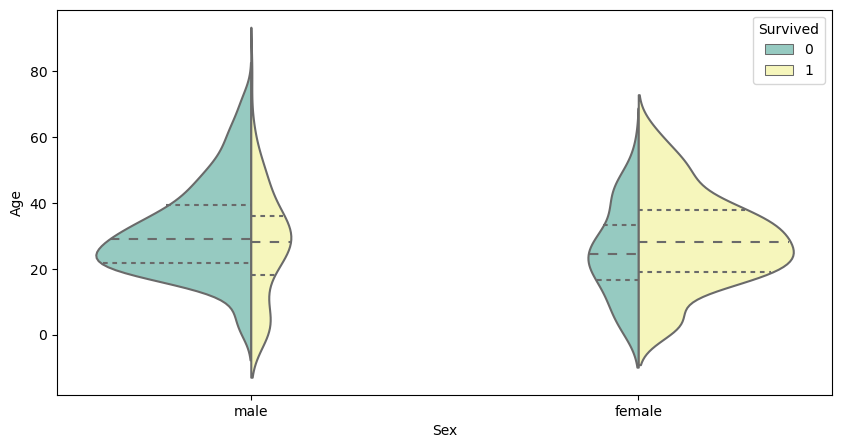

In [31]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df,palette="Set3",split=True,scale="count",inner="quartile")
plt.show()

It can be seen from the above plot that most of the women who survived the sinking of titanic were averagely of the age around 30 and most of the men who died were of the age around 30.

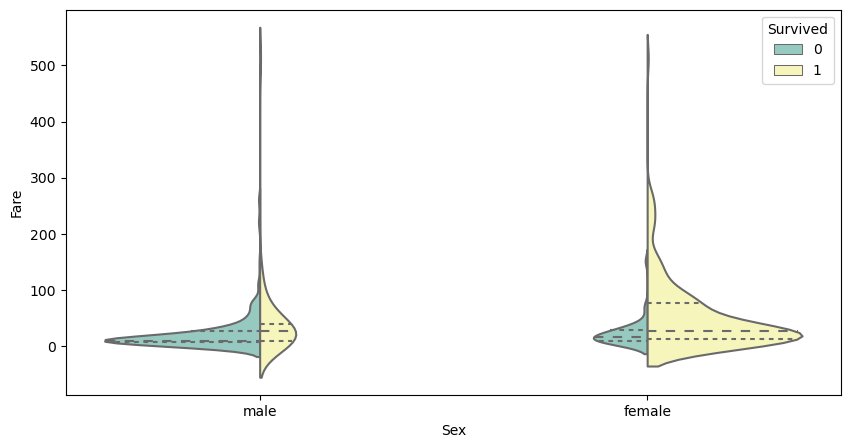

In [33]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Sex",y="Fare",hue="Survived",data=df,palette="Set3",split=True,scale="count",inner="quartile")
plt.show()

The plot depicts that the males who paid less for the ticket died more in comparison to those who paid higher amount for the ticket.

# Filling the missing values

In [34]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# BOX PLOT

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

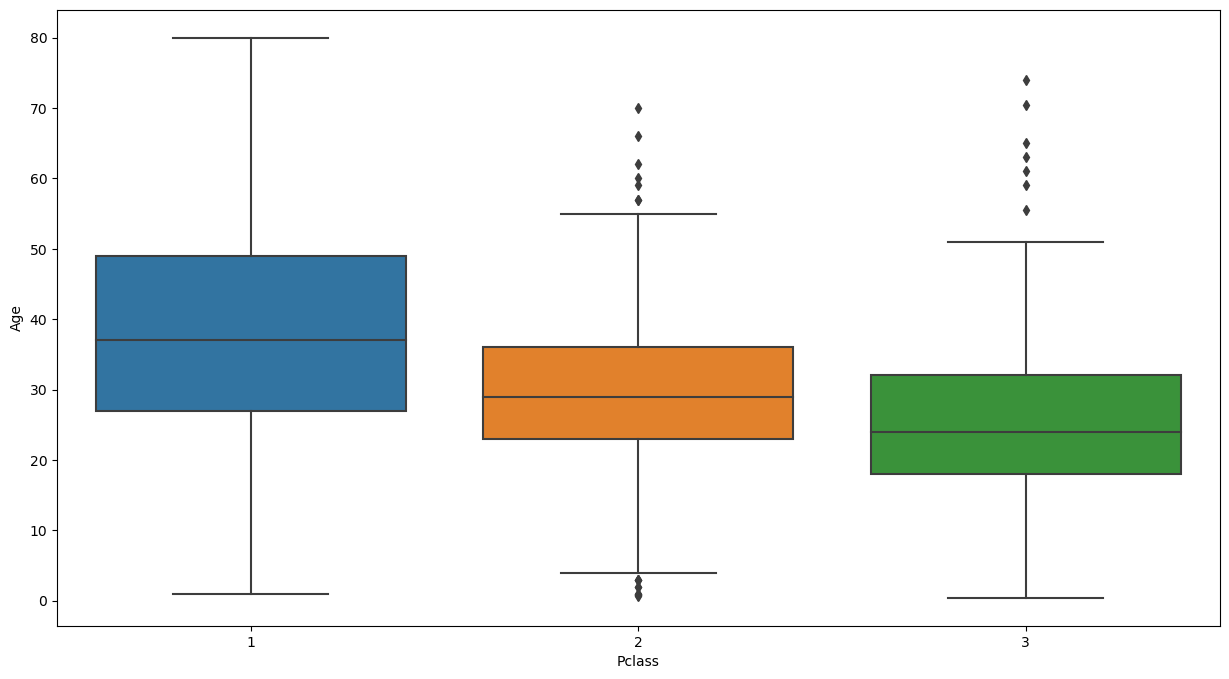

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Pclass', y='Age', data=df)

From the above plot it is clear that the Pclass 1 passengers were above the average age of Pclass 2 and Pclass 3 passengers.

In [38]:
def fill(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

After applying the observations from the boxplot to get the average age based on the Pclass.
It is clear that the Pclass 1 passengers average is 38 for Pclass 2 the average age is around 28 and for Pclass 3 it's 24.

In [39]:
df["Age"]=df[["Age","Pclass"]].apply(fill,axis=1)       #filling the missing values

In [41]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])   #filling the Embarked column using mode option.

In [91]:
df=pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


# DISTRIBUTION PLOT

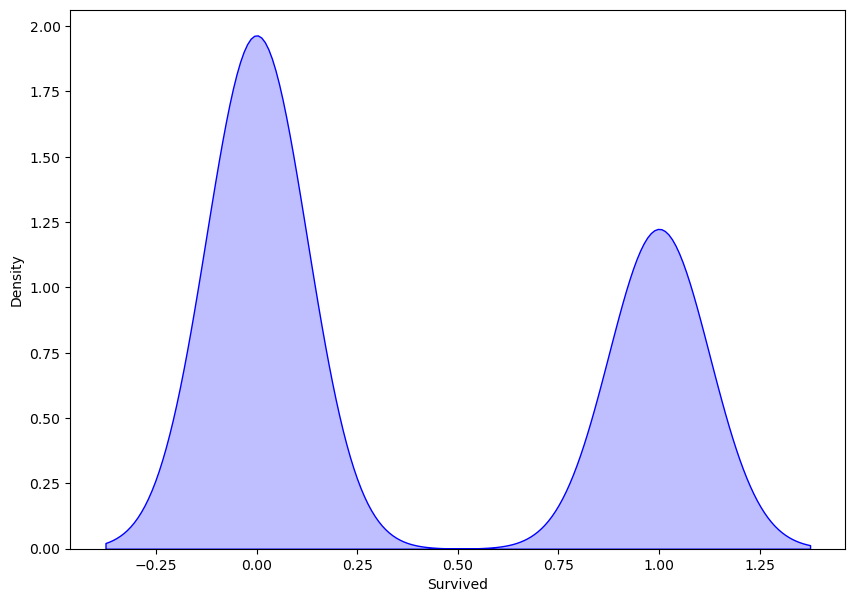

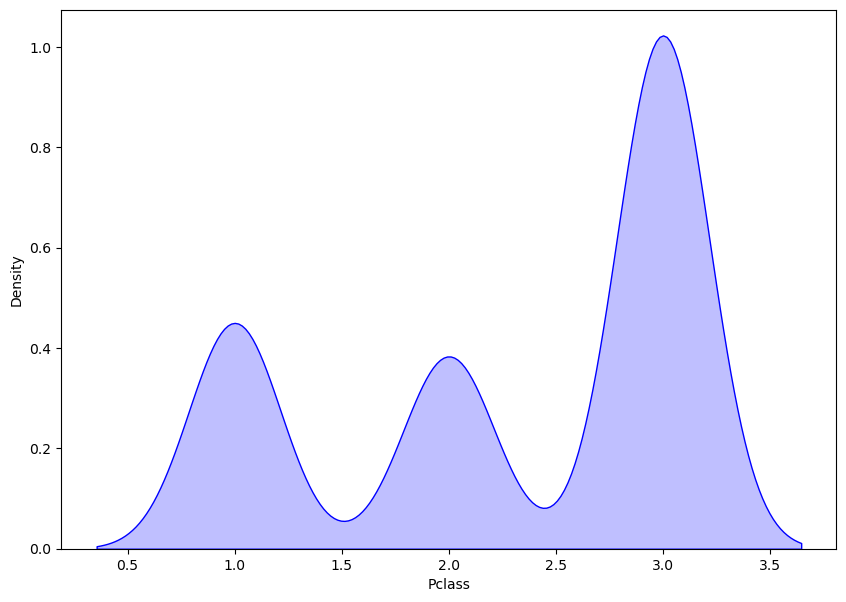

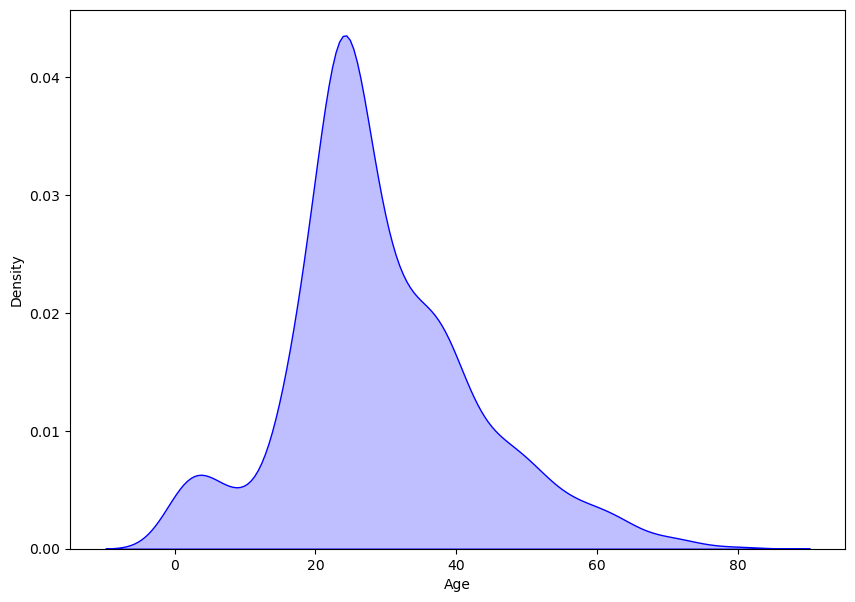

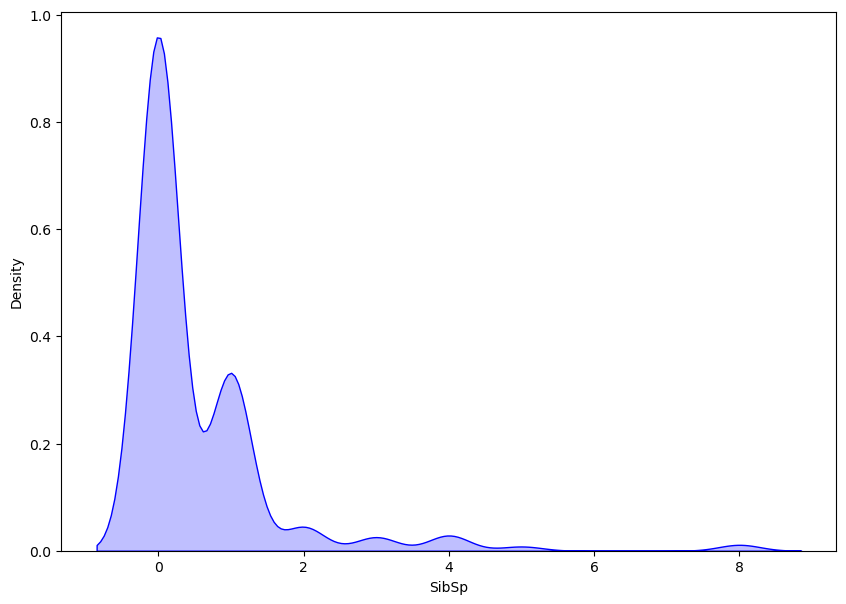

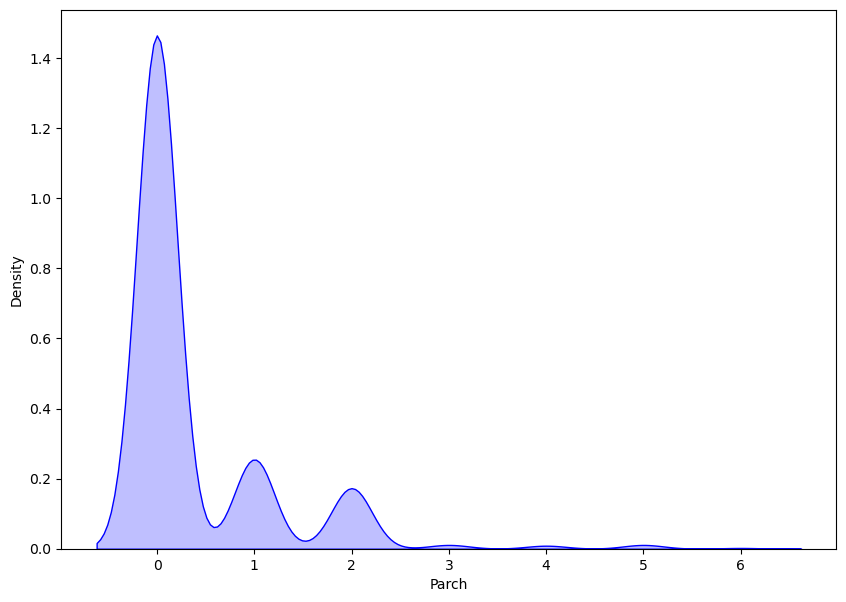

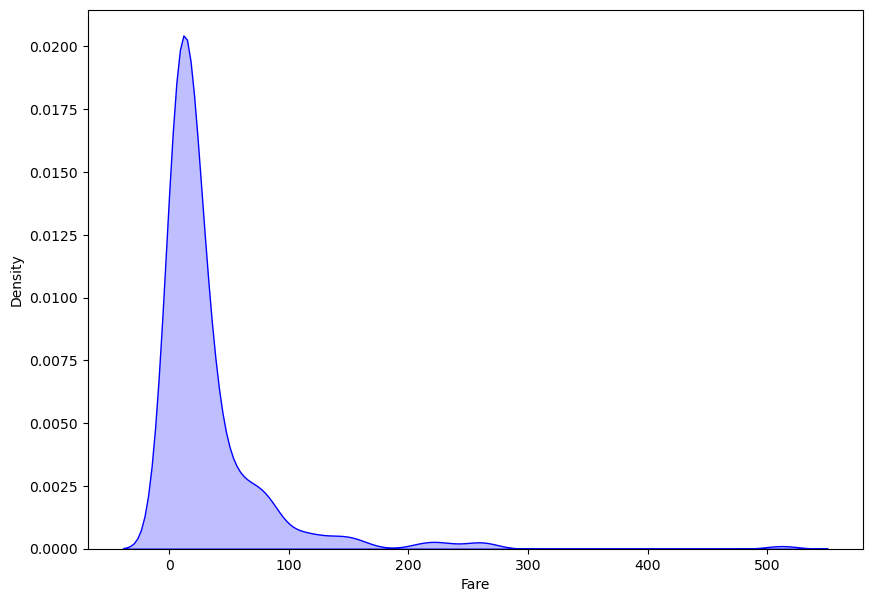

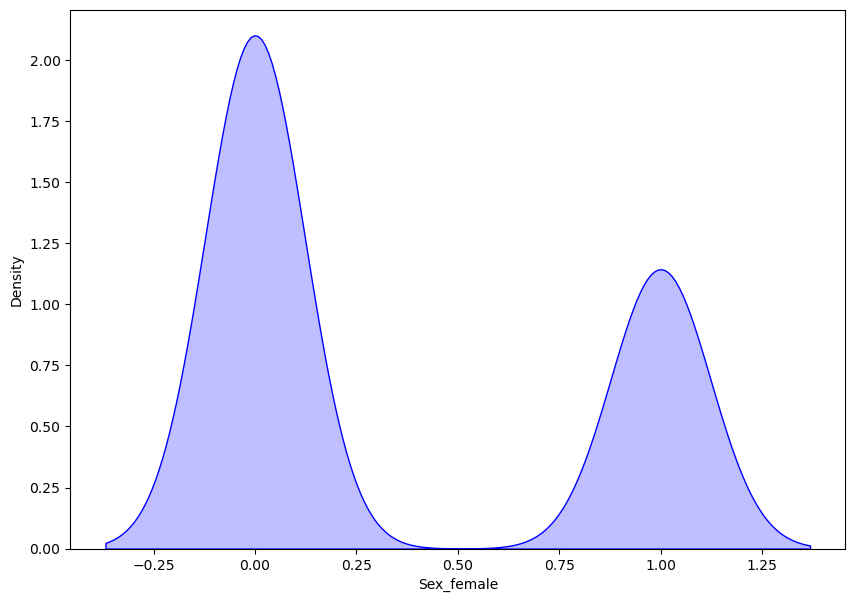

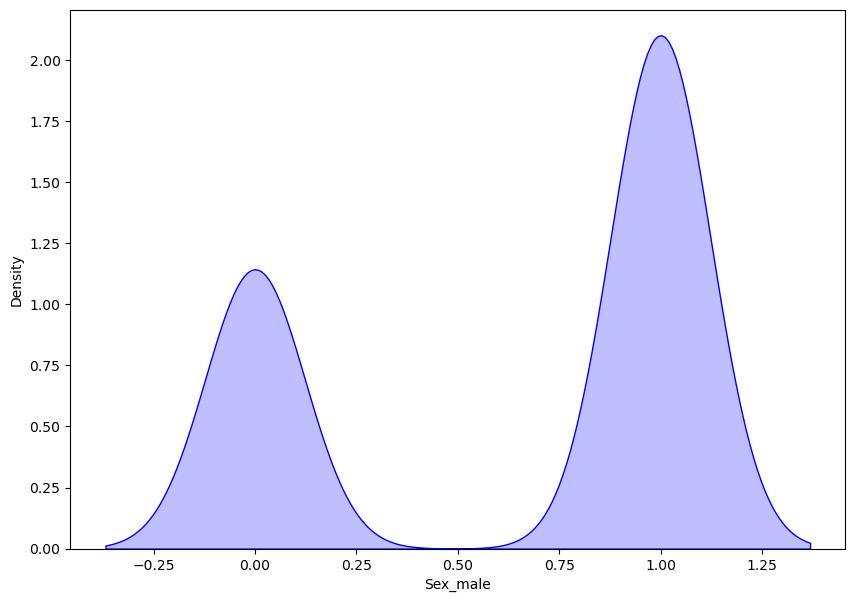

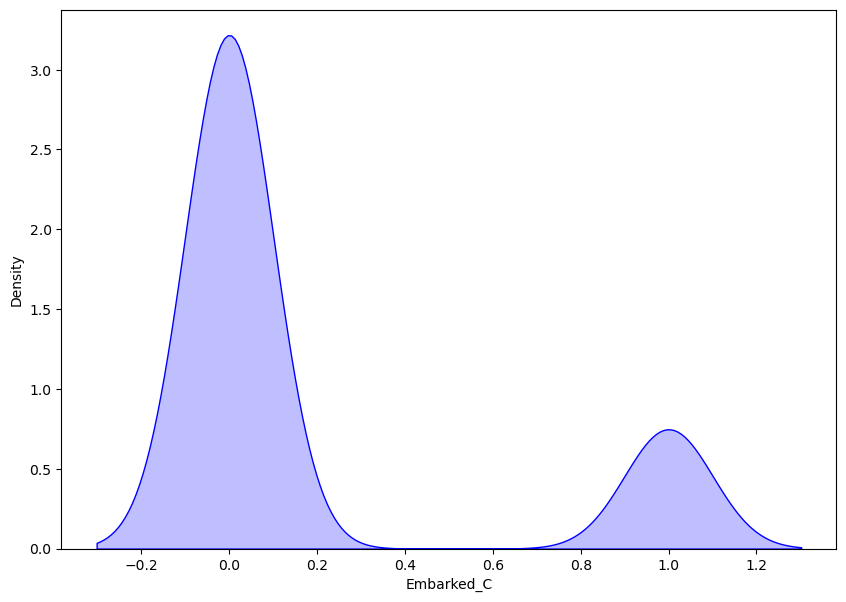

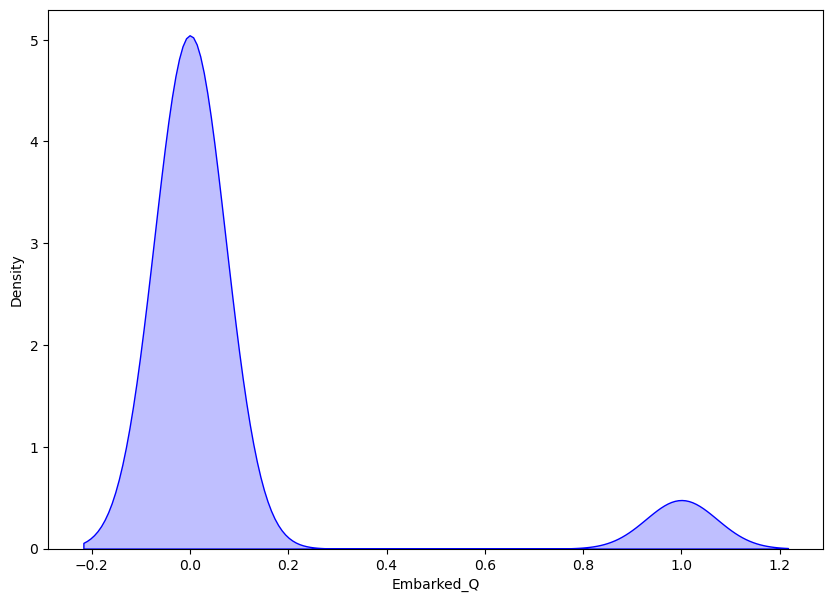

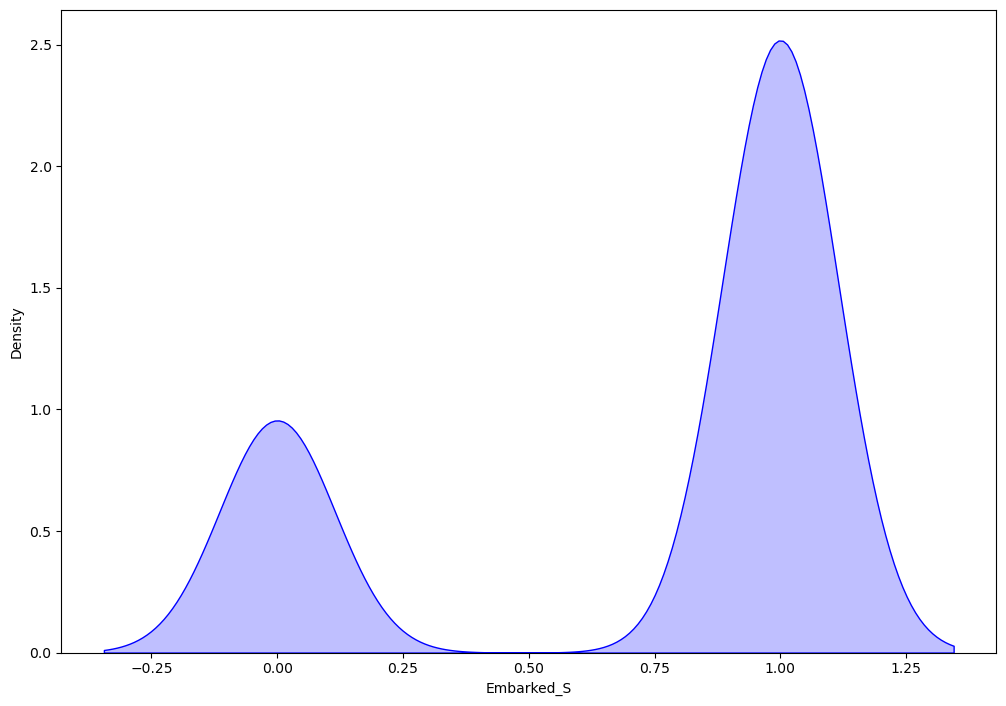

In [43]:
for col, value in df.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value,hist=False,color="b",kde_kws={"shade": True})
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show()

The presence of outliers are affecting the distribution pattern which is causing skewness that is need to be treated.

# CORRELATION USING A HEAT MAP

Text(0.5, 1.0, 'Correlation Factors Heat Map')

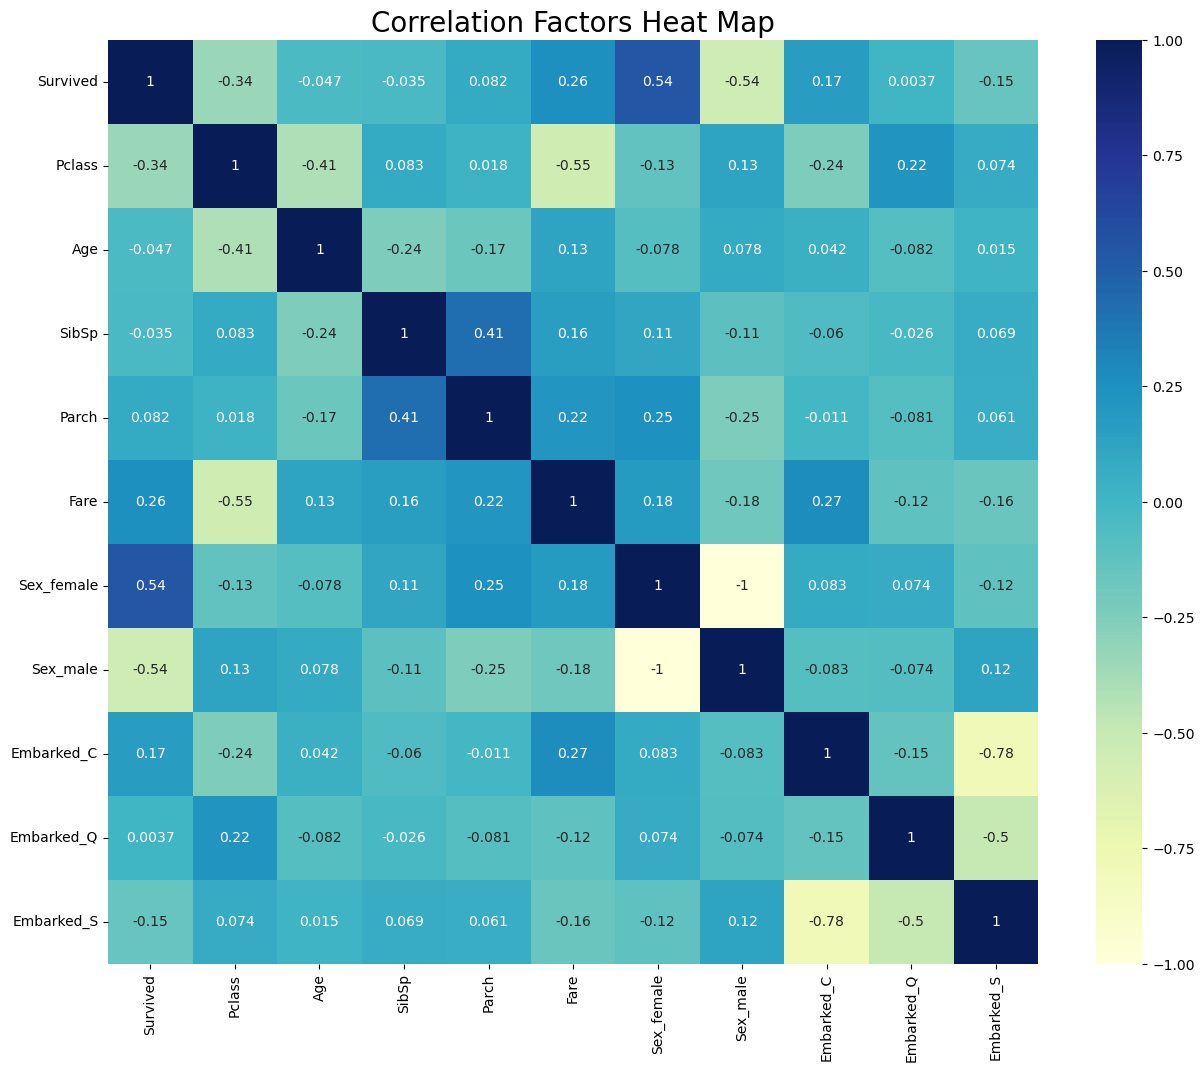

In [45]:
plt.figure(figsize=(15,12))                 #Plotting Heat Map
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu').set_title('Correlation Factors Heat Map', size='20')

In the correlation heatmap above the female column is a perfect negative correlation to male column
as there are more female passengers who survived and lower number of male passengers who survived.

# Splitting the dataset for feature and label

In [46]:
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [93]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.534558,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.672165,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.232878,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.445905,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.445905,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.157457,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.760819,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.383718,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.232878,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [94]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-1.211152e-16,2.330098e-17,3.643426e-16,8.784593e-17,-4.373606e-17,3.162453e-16,3.140025e-16,2.465293e-16,-4.017238e-16,-1.395567e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.162127e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-3.693648e-01,-5.345584e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,8.273772e-01,-2.328775e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,8.273772e-01,5.967450e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,8.273772e-01,3.839815e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01


In [96]:
X=X.drop(["SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"],axis=1)

# Creating the training and testing data sets

In [97]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=21)   #taking only 20% of the dataset for training purpose.

In [121]:
best_rstate=0
accu=0

for i in range(0,400):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    Lg=LogisticRegression()
    Lg.fit(X_train,Y_train)
    Y_pred=Lg.predict(X_test)
    tempaccu=r2_score(Y_test,Y_pred)
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  42.02429149797571 found on random state 396


# Using the random state 396 for the model

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=396)
Lg=LogisticRegression()
Lg.fit(X_train,Y_train)
Y_pred=Lg.predict(X_test)
score=r2_score(Y_test,Y_pred)
cvscore=cross_val_score(Lg,X_train,Y_train,cv=5).mean()
print(f"r2 score is {score*100} and cross validation score is {cvscore*100}")

r2 score is 42.02429149797571 and cross validation score is 77.94149512459371


It can be seen that the Logistic Regression Model is not performing well and not giving appropriate results.

# DECISION TREE CLASSIFIER

In [125]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
p=dt.predict(X_test)
print(f"accuracy score is {accuracy_score(Y_test,p)*100}")

accuracy score is 81.56424581005587


# KNN CLASSIFIER

In [126]:
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,Y_train)
p=kn.predict(X_test)
print(f"accuracy score is {accuracy_score(Y_test,p)*100}")

accuracy score is 82.12290502793296


# ADA BOOST CLASSIFIER

In [133]:
ABC=AdaBoostClassifier()
ABC.fit(X_train,Y_train)
p=rf.predict(X_test)
print(f"accuracy score is {accuracy_score(Y_test,p)*100}")

accuracy score is 84.91620111731844


From the above observations we can coclude that AdaBoostClassifier trains the model well and gives an accuracy of 84.91%.

# SAVING THE BEST MODEL

In [135]:
name="Titanic model.pkl"
pickle.dump(ABC,open(name,'wb'))

In [136]:
with open("Titanic model.pkl",'rb') as f:
    x=pickle.load(f)

# Saving the actual values in np array

In [137]:
a=np.array(Y_test)
a

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

# Saving the predicted values in array

In [138]:
predicted=np.array(ABC.predict(X_test))
predicted

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

# Comparing the original and predicted values

In [140]:
mod=pd.DataFrame({'Original':a,'Predicted':predicted})
mod.head(25)

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


I have trained the model using AdaBoostClassifier with accuracy of 84.91%.